<a href="https://colab.research.google.com/github/accarter/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [0]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
diagnosis = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")['diagnosis']

In [0]:
diagnosis_bin = diagnosis.map({'M': 1, 'B': 0})
diagnosis_bin.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [0]:
for i, label in enumerate(df.columns):
  print('{:2}'.format(i), label)

 0 id
 1 radius_mean
 2 texture_mean
 3 perimeter_mean
 4 area_mean
 5 smoothness_mean
 6 compactness_mean
 7 concavity_mean
 8 concave points_mean
 9 symmetry_mean
10 fractal_dimension_mean
11 radius_se
12 texture_se
13 perimeter_se
14 area_se
15 smoothness_se
16 compactness_se
17 concavity_se
18 concave points_se
19 symmetry_se
20 fractal_dimension_se
21 radius_worst
22 texture_worst
23 perimeter_worst
24 area_worst
25 smoothness_worst
26 compactness_worst
27 concavity_worst
28 concave points_worst
29 symmetry_worst
30 fractal_dimension_worst
31 Unnamed: 32


In [0]:
labels = list(df.columns[2:4]) + list(df.columns[5:11])
x_labels = labels
y_labels = labels
n_labels = len(x_labels) * len(y_labels)
print(n_labels)

64


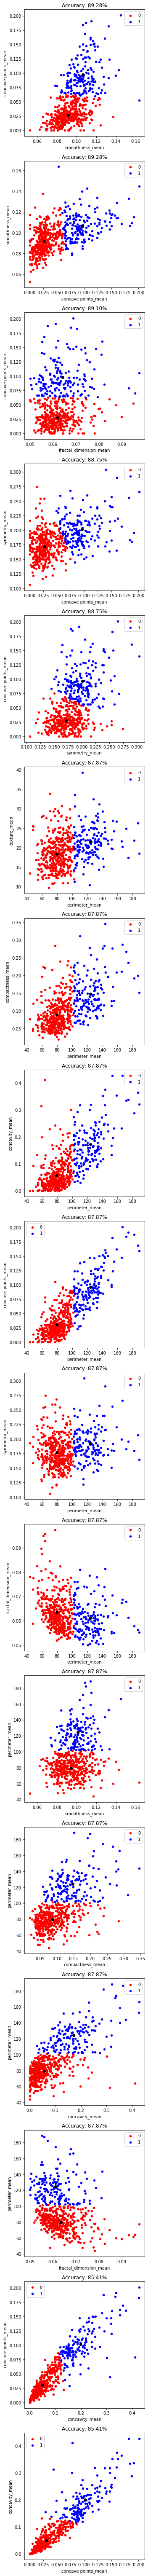

In [0]:
kmeans = KMeans(n_clusters=2)

def main():
  th = .85
  labels = list(df.columns[2:4]) + list(df.columns[5:11])
  x_labels = labels
  y_labels = labels
  n_labels = len(x_labels) * len(y_labels)

  prediction_dfs = []

  for i, x in enumerate(x_labels):
    for j, y in enumerate(y_labels):
      if x != y:
        predictions = get_predictions(x, y)
        accuracy = get_accuracy(predictions)
        if accuracy > th:
          prediction_dfs.append((predictions, accuracy))
  
  prediction_dfs.sort(key=lambda t: t[1], reverse=True)
  n_close = len(prediction_dfs)
  fig, axes = plt.subplots(n_close, figsize=(5, n_close * 5))

  if (n_close == 1):
    plot_clusters(prediction_dfs[0], x, y, axes)
  else:
    for i, (predictions, accuracy) in enumerate(prediction_dfs):
      column_headers = list(predictions.columns)
      column_headers.remove('prediction')
      x, y = column_headers
      ax = axes[i]
      plot_clusters(predictions, x, y, ax)
      ax.set_title('Accuracy: {:4.2f}%'.format(accuracy * 100))
    
    plt.tight_layout()


def get_clusters(x_label, y_label):
  return pd.DataFrame({
      x_label: df[x_label],
      y_label: df[y_label]
      })
  
def get_predictions(x_label, y_label):
  clusters = get_clusters(x_label, y_label)
  kmeans.fit(clusters)
  clusters['prediction'] = kmeans.labels_
  return clusters

def get_centroids(df,x,y):
    return df.groupby('prediction').mean()

def get_accuracy(predictions):
  return 1 - sum(abs(diagnosis_bin - predictions['prediction'])) / len(diagnosis_bin)

def plot_clusters(df, x_label, y_label, ax):
    colors = {
        0: 'red', 
        1: 'blue'
    }
  
    centroids = get_centroids(df, x_label, y_label)

    ax.plot(centroids.loc[:2, x_label], 
            centroids.loc[:2, y_label],
            "ok")
    
    grouped = df.groupby('prediction')
    
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x=x_label, y=y_label, label=key, color=colors[key])
  
main()

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# Plots with accuracies greater than 85% are displayed above
# in descending order with the exact accuracy displayed in the title.

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



# Clustering PC1 and PC2

In [0]:
df = df.copy()

In [0]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
df_processed = scaler.fit_transform(df)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [0]:
pca_features = pca.fit_transform(df_processed)
pd.DataFrame(pca_features).head()

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [0]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

0.9068541300527241

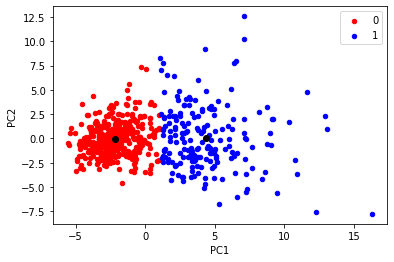

In [0]:
kmeans = KMeans(n_clusters=2)

x_label = 'PC1'
y_label = 'PC2'

clusters = pd.DataFrame({
    x_label: pca_features[:,0],
    y_label: pca_features[:,1]
})

kmeans.fit(clusters)
clusters['prediction'] = kmeans.labels_

fig, ax = plt.subplots()

colors = {
        0: 'red', 
        1: 'blue'
    }

centroids = clusters.groupby('prediction').mean()

ax.plot(centroids.loc[:2, x_label], 
        centroids.loc[:2, y_label],
        "ok")

grouped = clusters.groupby('prediction')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x=x_label, y=y_label, label=key, color=colors[key])

p = sum(abs(diagnosis_bin - clusters['prediction'])) / len(diagnosis_bin)
accuracy = max(p, 1-p)
accuracy

# Scree Plot and k-Means Clustering at 90% Variation

## Find the minimum number of components to explain 90% of the variation

In [0]:
pca = PCA(n_components=10)

In [0]:
pca_features = pca.fit_transform(df_processed)

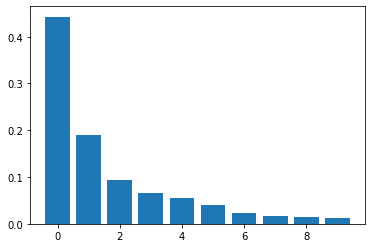

In [0]:
plt.bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_);

In [0]:
# number of components required to represent at least 90% of the variance
total = 0
for i, p in enumerate(pca.explained_variance_ratio_):
  total += p
  if total >= .9: 
    break

print('number of components:\t', i, '\npercent explained:\t', '{:4.2f}%'.format(total * 100))

number of components:	 6 
percent explained:	 91.01%


## Perform k-means clustering using 6 components after PCA

In [0]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(pd.DataFrame({f'PC{i+1}': pca_features[:,i] for i in range(6)}))
p = sum(abs(diagnosis_bin - kmeans.labels_)) / len(diagnosis_bin)
accuracy = max(p, 1-p)
accuracy

0.9103690685413005

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [0]:
# Preprocessing the data with PCA before k-means clustering is an improvement on 
# plotting any two features directly from the raw data in all cases.  Where the 
# most accurate prediction before PCA was 89.1%, after PCA accuracy is improved
# to 90.7%.  Using the number of components that are required to explain at least
# 90% of the variance (i.e. 6 components) increased the accuracy of the prediction
# to 91.0%, a negligible difference from the previous, but a nearly 2% increase
# in accuracy overall.

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project